In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from scipy.optimize import minimize
from scipy.misc import derivative
from sklearn.decomposition import PCA
%matplotlib inline

#### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
list1 = []
result_dict = {}
for el in raitings:
    if len(list1) == 0:
        list1.append(el)
    else:
        list1[0] = el
    for el2 in raitings:
        a = np.dot(list1[0], el2)/(np.linalg.norm(list1[0])*np.linalg.norm(el2))
        if a < 0.999999999:
            result_dict[str(el2)] = a
    for k,v in result_dict.items():
        if v == max(result_dict.values()):
            print(list1[0], k)

[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3] [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
pca = PCA(n_components = 5)
pca.fit(raitings)
pca.transform(raitings)

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

#### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [5]:
def f(x):
    return (np.tan(np.sin(x) + np.cos(2*x + 3)))**2

In [6]:
derivative(f, 1.0, dx = 1e-6)

55.3859176464222

#### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [7]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [8]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [9]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

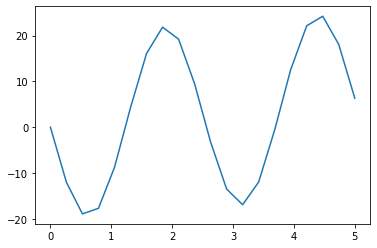

In [10]:
plt.plot(x, fx)
plt.show()

In [11]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [12]:
params = [0,0]
error(params)

244.50954835

In [13]:
methods = ['Nelder-Mead',
           'Powell',
           'CG',
           'BFGS',
           'L-BFGS-B',
           'TNC',
           'COBYLA'
          ]
dict_res = {}
dict_res1 = {}

In [14]:
for el in methods:
    result = minimize(error, params, method = el)
    dict_res[result.fun] = result.x
    dict_res1[result.fun] = el
#    dict_res2[result.fun] = result.nit
for k,v in dict_res.items():
    if k == min(dict_res.keys()):
        gx = f(x, v[0], v[1])
for k1,v1 in dict_res1.items():
    if k == k1:
        print('Метод минимизации:', v1)
print('Абсолютная ошибка:', k)
print('Коэффициент а:', v[0])
print('Коэффициент b:', v[1])
print('Значения:', gx)

Метод минимизации: COBYLA
Абсолютная ошибка: 0.07674566111565184
Коэффициент а: 3.0001879620826215
Коэффициент b: -2.500089262452252
Значения: [  0.         -12.02087278 -18.91357798 -17.69078406  -8.75310657
   4.27813503  16.07269782  21.81660907  19.22183971   9.48147798
  -3.22834511 -13.49184748 -16.91450459 -11.957613    -0.58064769
  12.57675148  22.13167506  24.20512418  18.04136351   6.32341483]


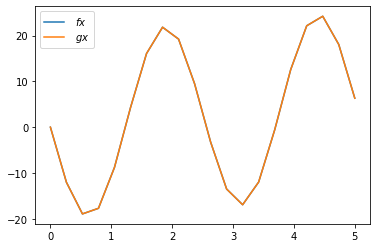

In [17]:
p1, = plt.plot(x, fx, label='$\ fx$')
p2, = plt.plot(x, gx, label='$\ gx$')
plt.legend()
plt.show()

#### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


(array([  2.,  28.,  89., 179., 261., 228., 146.,  59.,   7.,   1.]),
 array([ 6.74,  7.31,  7.88,  8.45,  9.02,  9.59, 10.16, 10.73, 11.3 ,
        11.87, 12.44]),
 <a list of 10 Patch objects>)

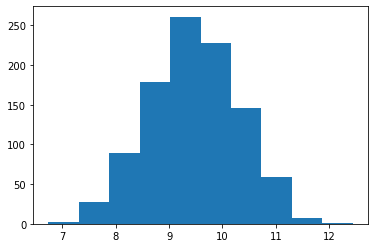

In [18]:
trials = 1000
means = []
a = np.arange(0, 20 ,1)
print(a)
for i in range(trials):
    rv = np.random.choice(a,50)
    means.append(rv.mean())
plt.hist(means)

#### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

In [19]:
m = np.array([[1, 4], [1, 1]]) 
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))